In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import scipy.io as sio
import pandas as pd
from matplotlib import pyplot as plt 
from matplotlib import cm
import numpy as np
from numpy import ma
from scipy.linalg import eig
from datetime import datetime
import pytz
from matplotlib import colors
import matplotlib
import seaborn as sns
plt.rcParams['figure.dpi'] = 300
from Asymptotic import select_asymptotic
import xarray as xr
from Turbulence_processing.Scaling.Anisotropy import Anisotropy

In [4]:
#Load data
Dataset_name = 'MetCrax'

data_1 = xr.open_dataset(Dataset_name + '_stable_1m.nc')
data_30 = xr.open_dataset(Dataset_name + '_unstable_30m.nc')

heights = data_1.heights.data

# Stable conditions

In [5]:
ds_1c = xr.open_dataset('Metcrax_stable_1c.nc')
ds_2c = xr.open_dataset('Metcrax_stable_2c.nc')
ds_3c = xr.open_dataset('Metcrax_stable_3c.nc')

In [6]:
cmap = plt.get_cmap('Set2')
color = dict(
    red = cmap(1),
    blue = cmap(2),
    yellow = cmap(5)
)

In [7]:
#component index

data = xr.concat(   [ds_1c.assign_coords(C = '1c').stack(index = ('time','heights')).reset_index('index').dropna(dim='index'),
                    ds_2c.assign_coords(C = '2c').stack(index = ('time','heights')).reset_index('index').dropna(dim='index'),
                    ds_3c.assign_coords(C = '3c').stack(index = ('time','heights')).reset_index('index').dropna(dim='index')]
                , dim = 'index')

#pandas dataframe
df = data[['heights','beta', 'C']].to_dataframe()
df['beta_median'] = df.groupby(['heights','C'])['beta'].transform('median')

Text(0, 0.5, 'Z')

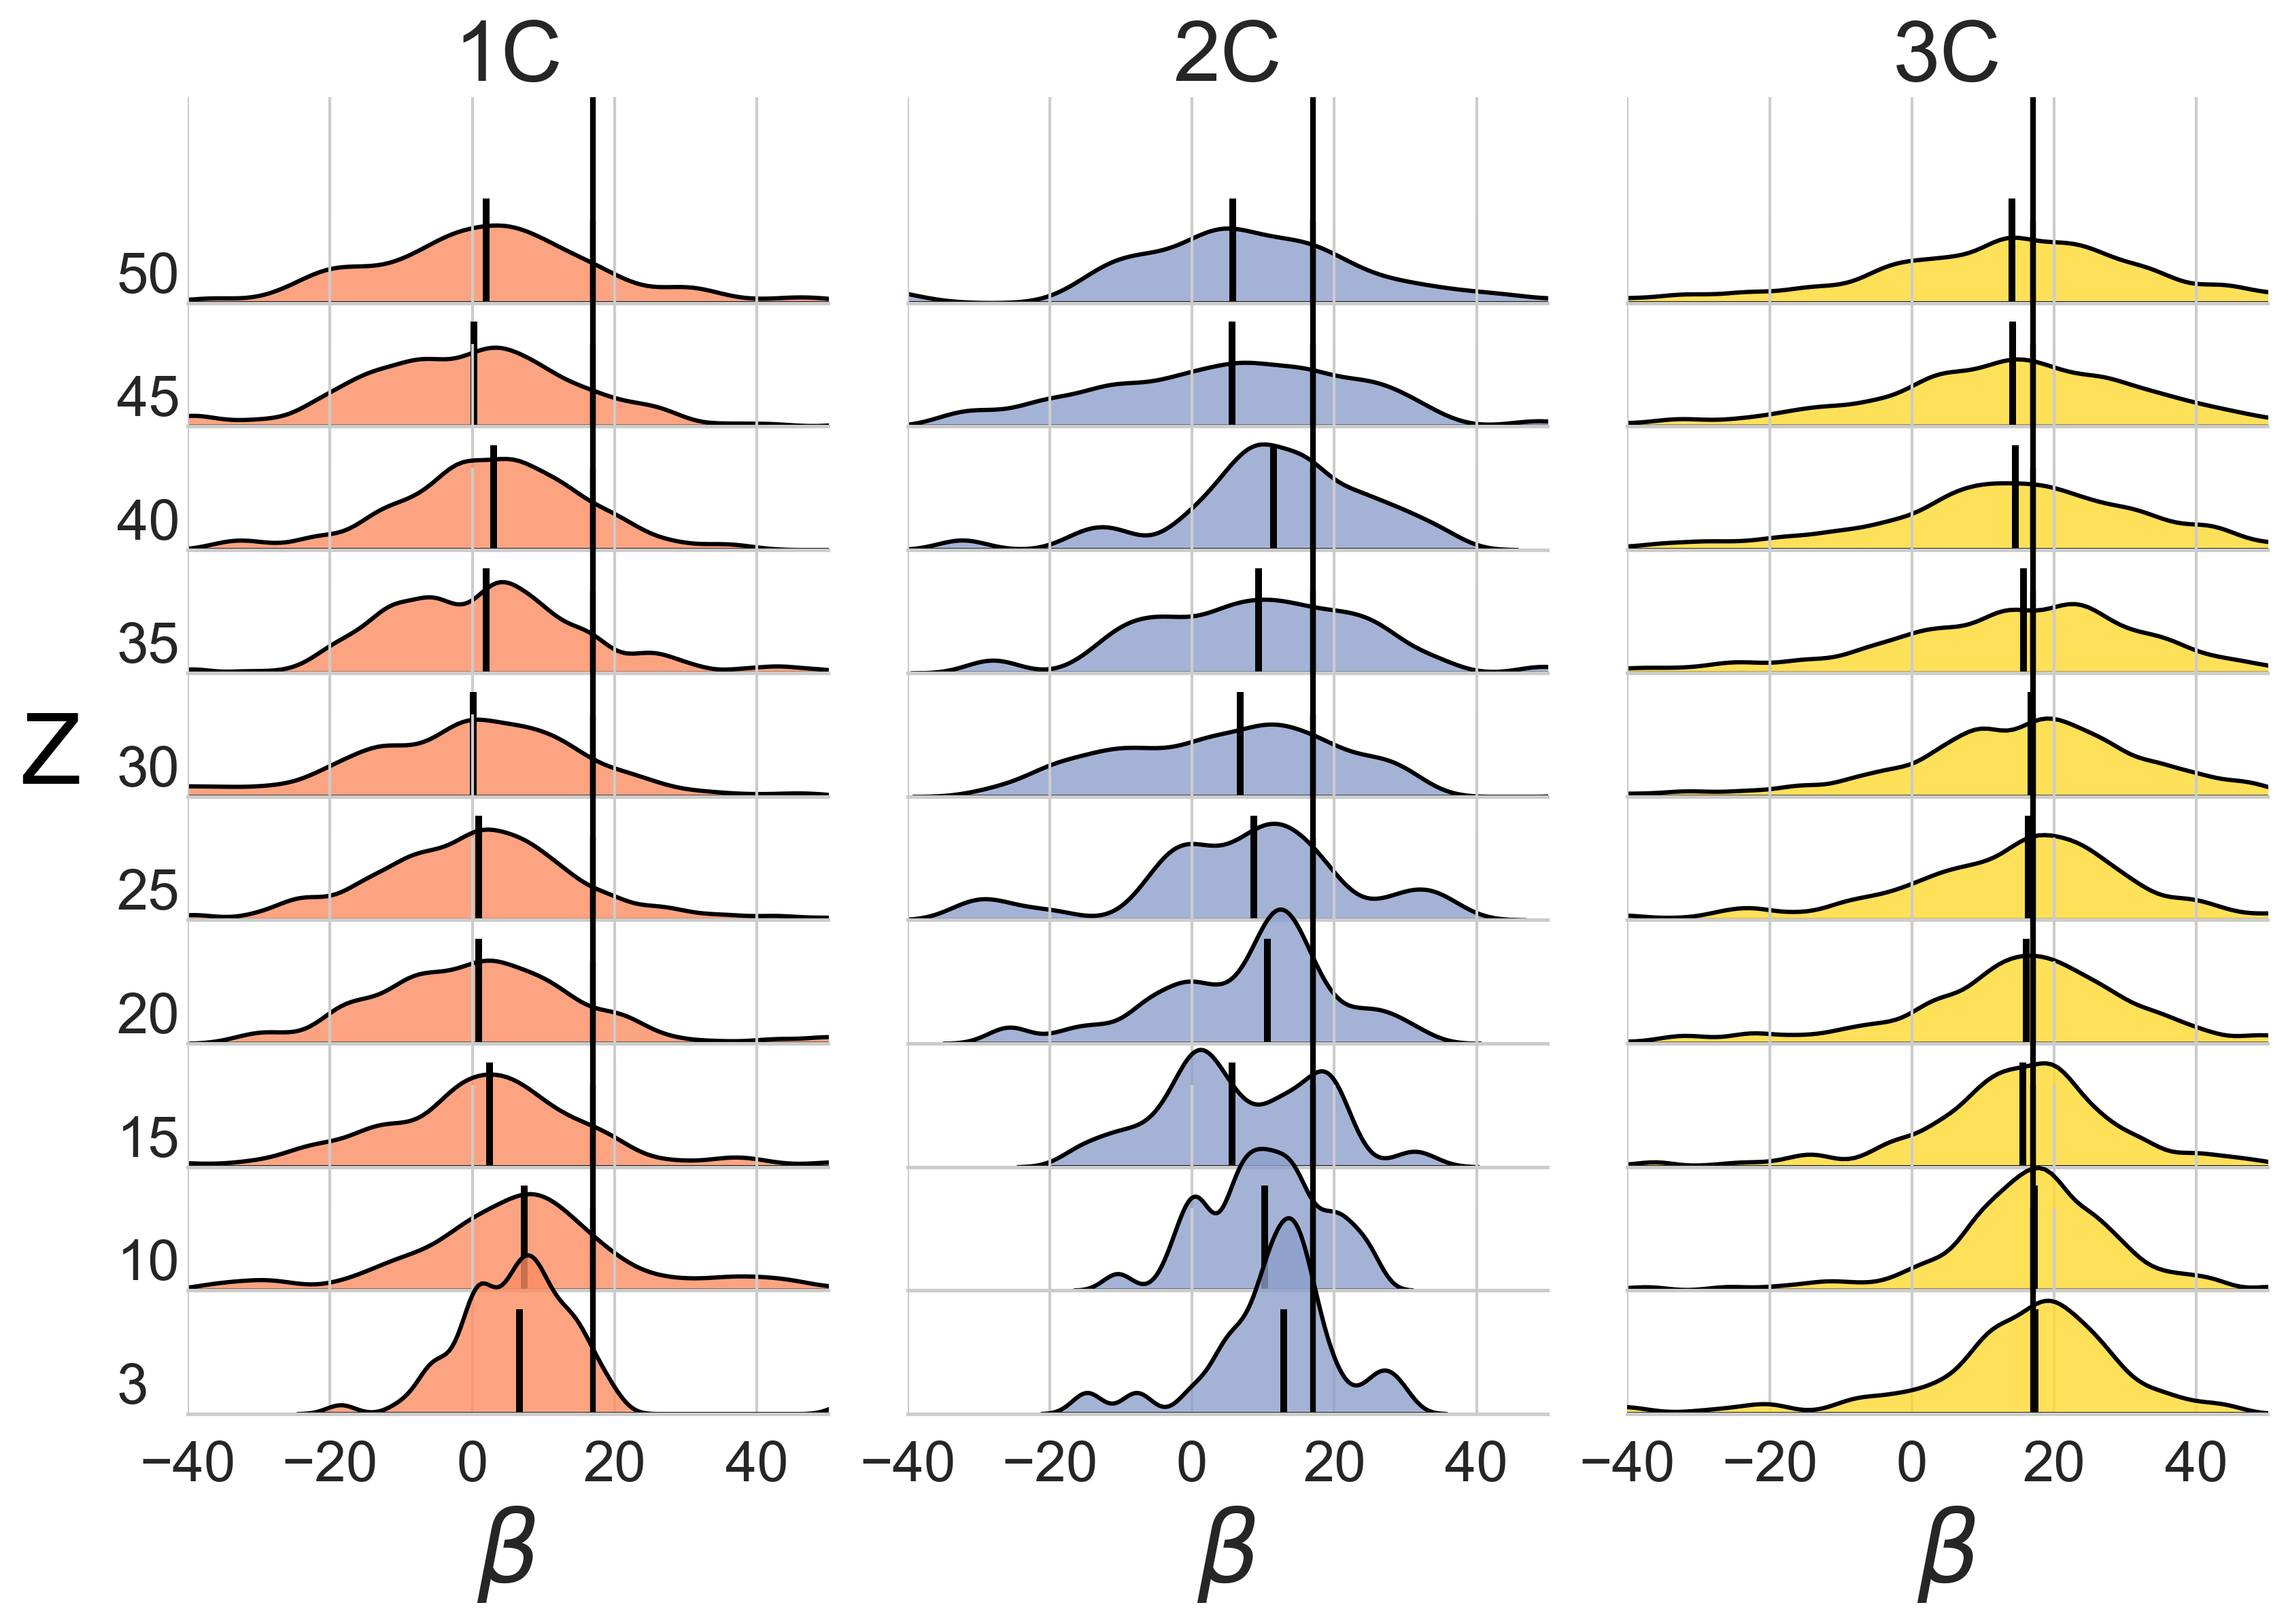

In [8]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df, row = 'heights', col = 'C', hue='C',
                  palette = [color['red'],color['blue'],color['yellow']],
                  row_order=heights[::-1], aspect=5, height=0.75)

g.map(sns.kdeplot, 'beta',
      bw_adjust =0.5, edgecolor = 'black',
      fill=True, alpha=0.8, linewidth=1.5,
      common_norm = False)

g.map(plt.axvline, x=17,
      lw=2, color = 'black')

def vline(x,**kwargs):
    return plt.vlines(x,0,0.035, **kwargs)

g.map(vline,'beta_median', lw = 2, color = 'black')

# labels
for i, ax in enumerate(g.axes[:,0]):
    ax.set_ylabel(heights[::-1][i], fontsize=20, rotation = 0, labelpad = 25, loc ='bottom')
    ax.set_xlim([-40,50])
    
for ax in g.axes[-1,:]:
    plt.setp(ax.get_xticklabels(), fontsize=20)
    ax.set_xlabel(r'$\beta$', fontweight='bold', fontsize=35)
    
#layout
g.fig.subplots_adjust(hspace=-0.4)
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

axs = g.axes
axs[0,0].set_title('1C', fontsize = 30)
axs[0,1].set_title('2C', fontsize = 30)
axs[0,2].set_title('3C', fontsize = 30)

fig = g.fig

# overall ylabel
g.fig.text(0,0.5, 
            #verticalalignment='center', #make sure it's aligned at center vertically
           s='Z',
           color = 'black',
           fontsize =35, 
           rotation=0)

In [9]:
plt.style.use('default')
plt.rcParams['figure.dpi'] = 300


# Unstable conditions

In [10]:
ds_1c = xr.open_dataset('Metcrax_unstable_1c.nc')
ds_2c = xr.open_dataset('Metcrax_unstable_2c.nc')
ds_3c = xr.open_dataset('Metcrax_unstable_3c.nc')

In [11]:
#component index

data = xr.concat(   [ds_1c.assign_coords(C = '1c').stack(index = ('time','heights')).reset_index('index').dropna(dim='index'),
                    ds_2c.assign_coords(C = '2c').stack(index = ('time','heights')).reset_index('index').dropna(dim='index'),
                    ds_3c.assign_coords(C = '3c').stack(index = ('time','heights')).reset_index('index').dropna(dim='index')]
                , dim = 'index')

#pandas dataframe
df = data[['heights','beta', 'C']].to_dataframe()
df['beta_median'] = df.groupby(['heights','C'])['beta'].transform('median')
df

,heights,beta,C,timezone,status,time,beta_median
index,,,,,,,
0,20,4.100827,1c,US/Mountain,0,2013-10-01 20:30:00,4.019690
1,25,1.871135,1c,US/Mountain,0,2013-10-01 20:30:00,4.756650
2,30,-1.018230,1c,US/Mountain,0,2013-10-01 20:30:00,4.494752
3,35,-1.009384,1c,US/Mountain,0,2013-10-01 20:30:00,4.440332
4,40,-1.854155,1c,US/Mountain,0,2013-10-01 20:30:00,4.384768
...,...,...,...,...,...,...,...
1682,30,-6.820701,3c,US/Mountain,0,2013-10-30 21:30:00,6.149992
1683,35,-10.085119,3c,US/Mountain,0,2013-10-30 21:30:00,6.730403
1684,40,-11.331625,3c,US/Mountain,0,2013-10-30 21:30:00,8.242858


C:\Users\samue\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\samue\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Z')

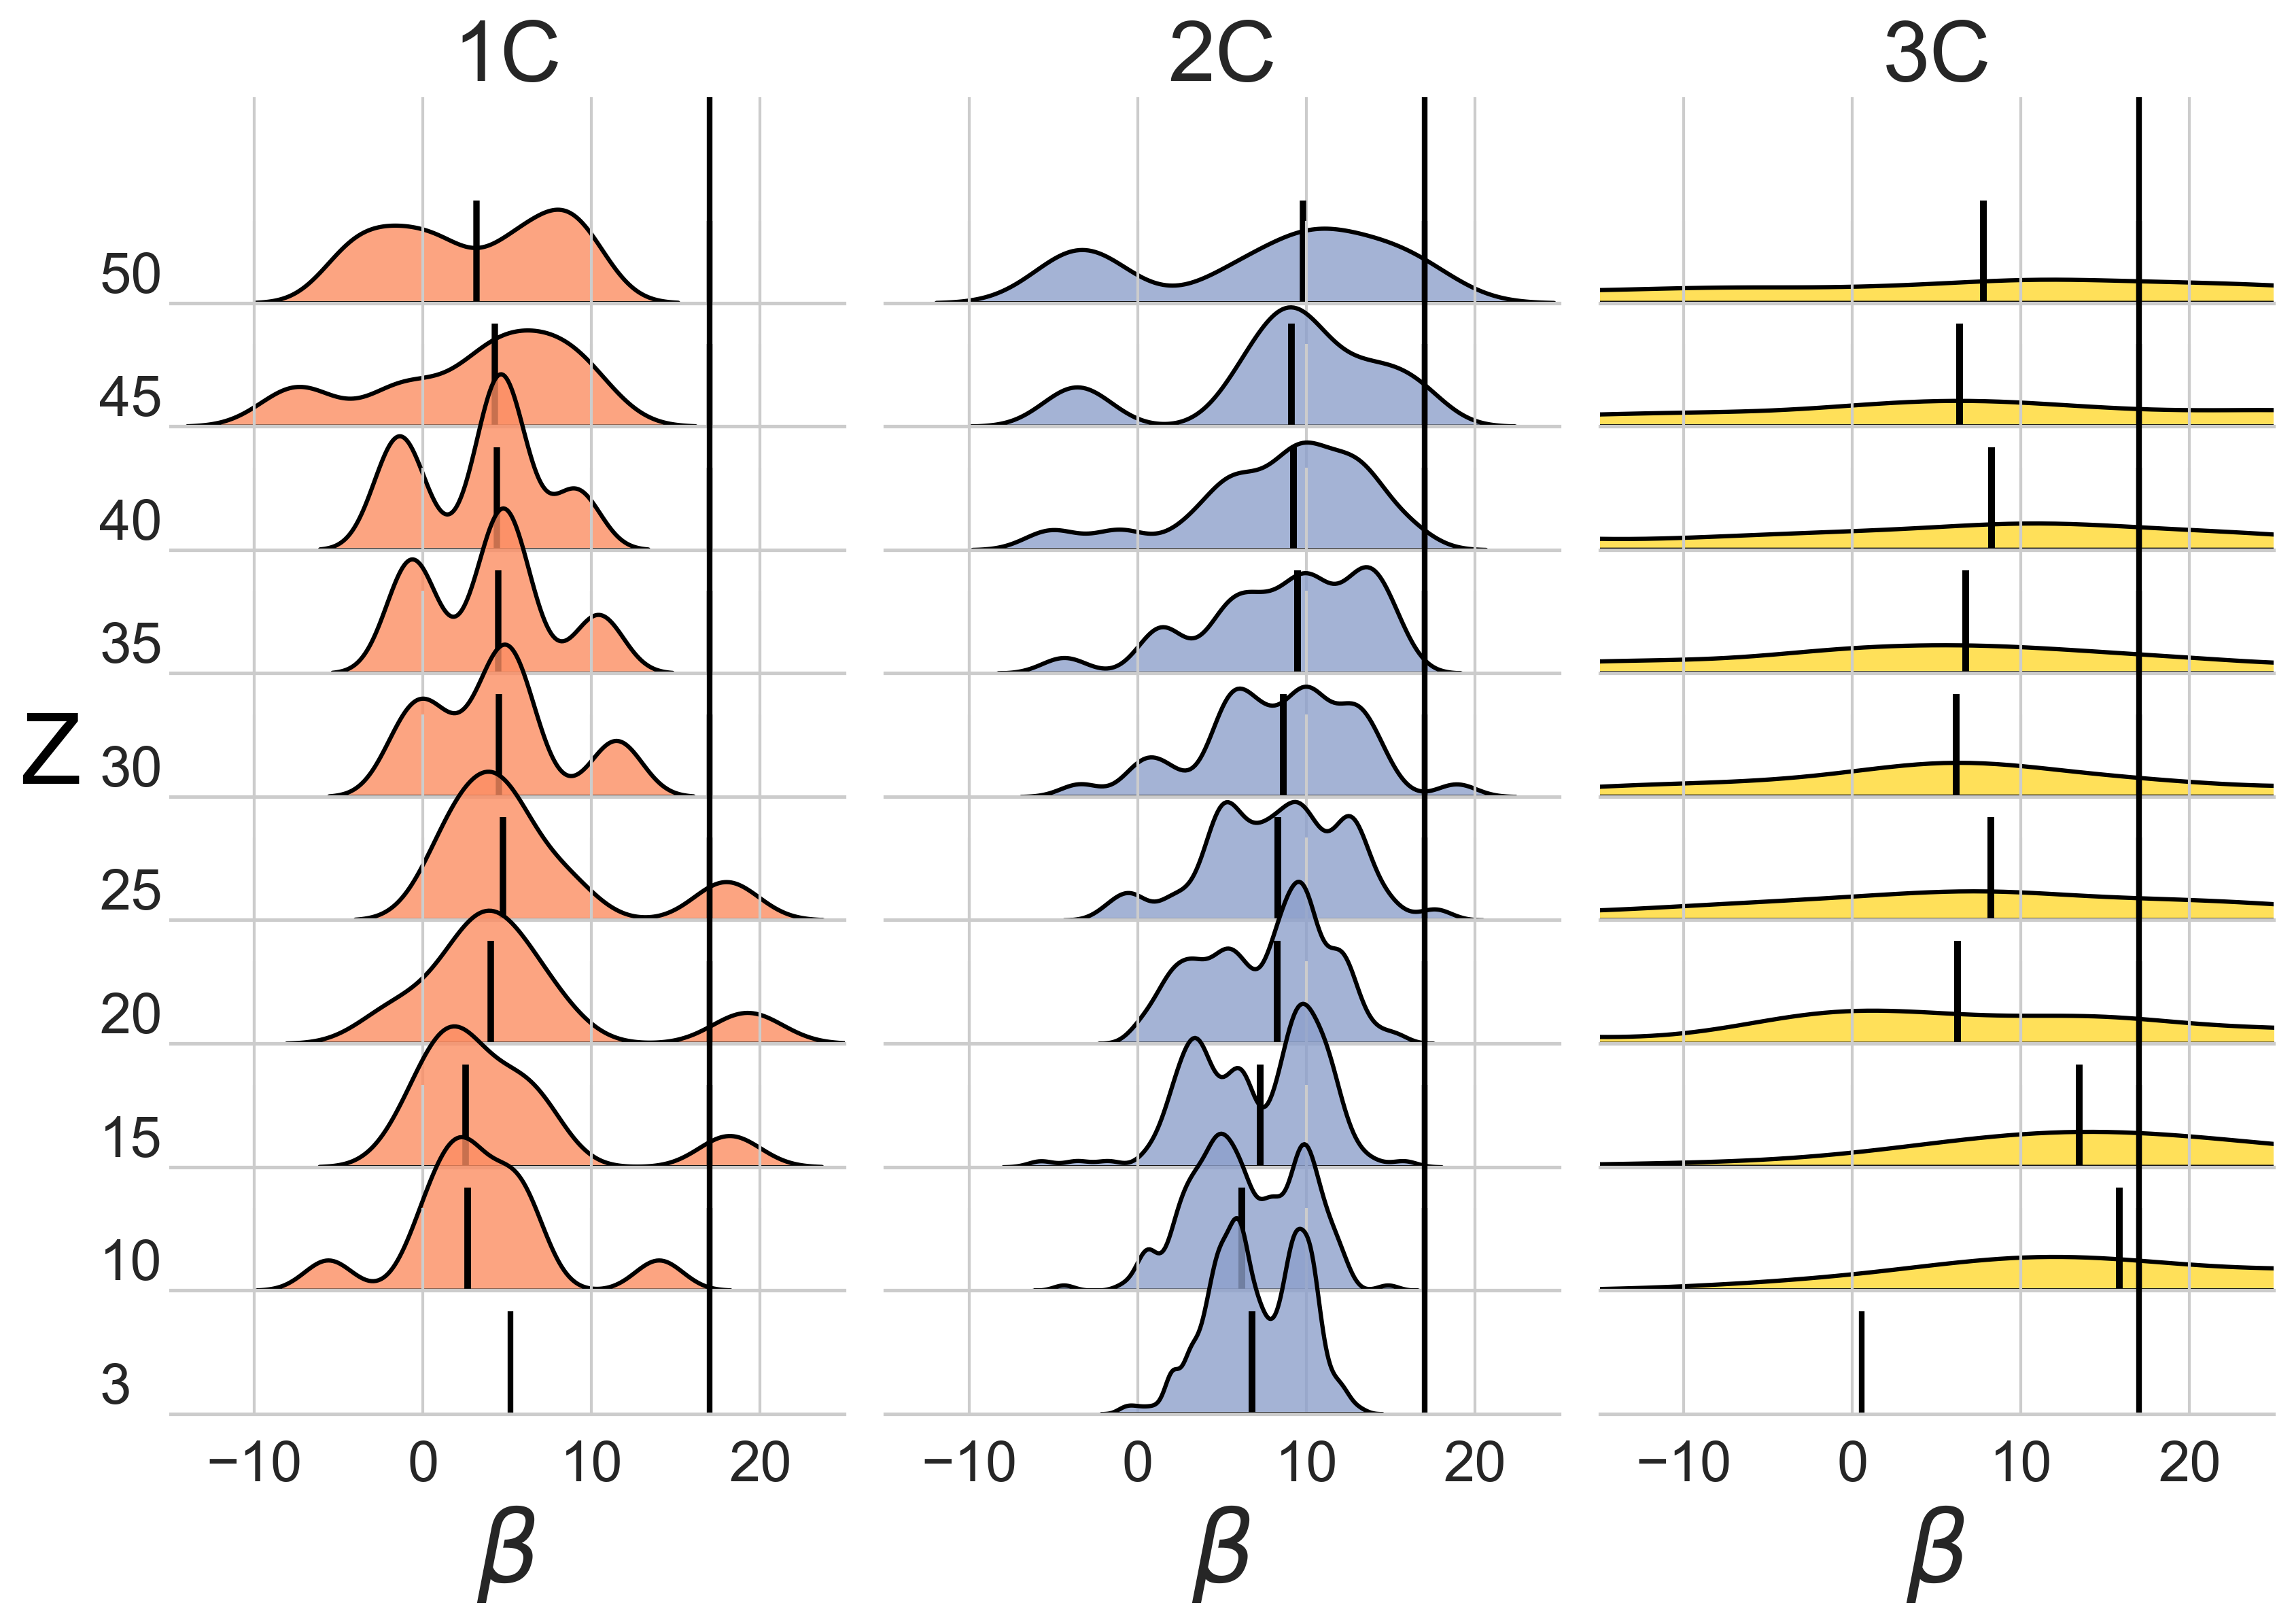

In [12]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0)})

g = sns.FacetGrid(df, row = 'heights', col = 'C', hue='C',
                  palette = [color['red'],color['blue'],color['yellow']], row_order=heights[::-1],
                  aspect=5, height=0.75)

g.map(sns.kdeplot, 'beta',
      bw_adjust =0.5, edgecolor = 'black',
      fill=True, alpha=0.8, linewidth=1.5,
      common_norm = False)

g.map(plt.axvline, x=17,
      lw=2, color = 'black')

def vline(x,**kwargs):
    return plt.vlines(x,0,0.08, **kwargs)

g.map(vline,'beta_median', lw = 2, color = 'black')

# labels and limits
for i, ax in enumerate(g.axes[:,0]):
    ax.set_ylabel(heights[::-1][i], fontsize=20, rotation = 0, labelpad = 25, loc ='bottom')
    ax.set_xlim([-15,25])
    
# for i, ax in enumerate(g.axes[:,1]):
#     ax.set_xlim([-15,25])

    
# for i, ax in enumerate(g.axes[:,2]):
#     ax.set_xlim([-40,50])
    
for ax in g.axes[-1,:]:
    plt.setp(ax.get_xticklabels(), fontsize=20)
    ax.set_xlabel(r'$\beta$', fontweight='bold', fontsize=35)
    
#layout
g.fig.subplots_adjust(hspace=-0.4)
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

axs = g.axes
axs[0,0].set_title('1C', fontsize = 30)
axs[0,1].set_title('2C', fontsize = 30)
axs[0,2].set_title('3C', fontsize = 30)

fig = g.fig

# overall ylabel
g.fig.text(0,0.5, 
            #verticalalignment='center', #make sure it's aligned at center vertically
           s='Z',
           color = 'black',
           fontsize =35, 
           rotation=0)

In [13]:
plt.style.use('default')

## allogether plot with stability

In [14]:
ds_1c_sh = pd.read_csv('all_Rey_1c.csv')
ds_2c_sh = pd.read_csv('all_Rey_2c.csv')
ds_3c_sh = pd.read_csv('all_Rey_3c.csv')


ds_1c_sh = ds_1c_sh.drop('datetime',axis=1)
ds_2c_sh = ds_2c_sh.drop('datetime',axis=1)
ds_3c_sh = ds_3c_sh.drop('datetime',axis=1)

ds_1c_sh = ds_1c_sh.to_xarray()
ds_2c_sh = ds_2c_sh.to_xarray()
ds_3c_sh = ds_3c_sh.to_xarray()


In [15]:
#only data where the heatflux has the same sign for the whole profile
ds_stable = data_1.where(data_1.wT < 0).dropna(dim = 'time', how = 'any')
ds_unstable = data_30.where(data_30.wT > 0).dropna(dim = 'time', how = 'any')

ds_1c_st = xr.open_dataset('Metcrax_stable_1c.nc')
ds_2c_st = xr.open_dataset('Metcrax_stable_2c.nc')
ds_3c_st = xr.open_dataset('Metcrax_stable_3c.nc')
ds_1c_un = xr.open_dataset('Metcrax_unstable_1c.nc')
ds_2c_un = xr.open_dataset('Metcrax_unstable_2c.nc')
ds_3c_un = xr.open_dataset('Metcrax_unstable_3c.nc')


In [16]:
datasets = [[ds_1c_st, ds_2c_st, ds_3c_st],[ds_1c_sh, ds_2c_sh, ds_3c_sh],[ds_1c_un, ds_2c_un, ds_3c_un]]

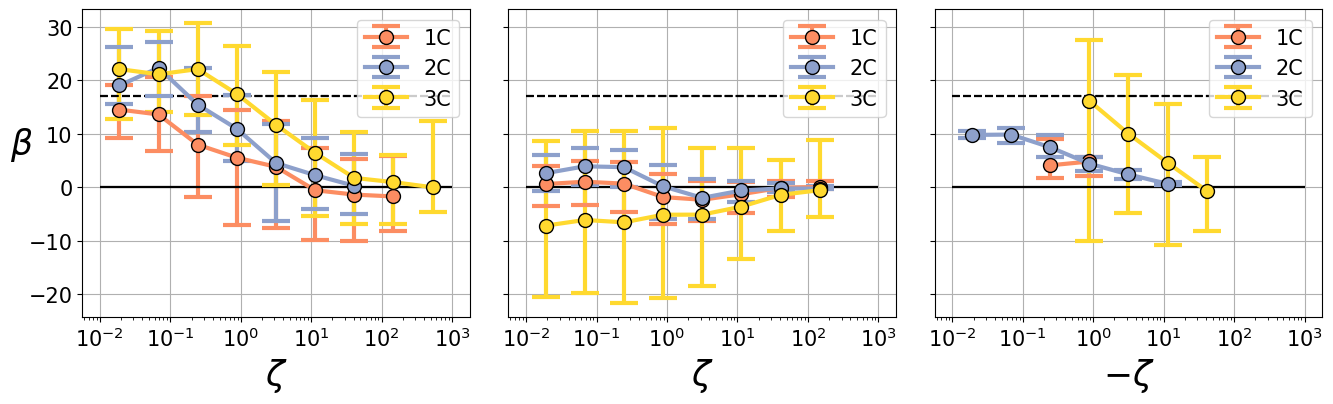

In [17]:
#binmedians
min, max, n = -2, 3, 10
exp_bin = np.linspace(min, max, n)
exp_labels = (exp_bin[:-1] + exp_bin[1:]) / 2
bins_zeta = 10 ** (exp_bin)
labels_zeta = 10 ** exp_labels

fig, axs = plt.subplots(1,3,figsize =(16,4), sharey = True, sharex= True)

for ax, data in zip(axs, datasets):
    for ds, c, label in zip(data, [color['red'],color['blue'],color['yellow']], ['1C', '2C', '3C']):

        ds_groups = ds.groupby_bins(ds.zeta, bins = bins_zeta, labels = labels_zeta)
        bin_count = ds_groups.count().zeta
        ds_median = ds_groups.median().where(bin_count>10)
        ds_UQ = ds_groups.quantile(0.25).where(bin_count>10)
        ds_LQ = ds_groups.quantile(0.75).where(bin_count>10)

        bars = np.array([ds_median.beta.data-ds_LQ.beta.data,ds_UQ.beta.data-ds_median.beta.data])
        ax.errorbar(ds_median.zeta_bins, ds_median.beta, yerr = bars,
                    color = c, linewidth = 3, label = label, capsize = 10, capthick = 3,
                   marker = 'o', markeredgecolor = 'black', markersize = 10)#, markeredgewidth = 1.5)
        #klipp angle
        ax.hlines(17, 1e-2, 1e3, color = 'black', linestyle = 'dashed')
        ax.hlines(0, 1e-2, 1e3, color = 'black')

        #visuals
        ax.legend(fontsize = 15)
        ax.grid() 
        ax.set_xscale('log')

        # set xtick sizes
        for item in (ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(15)

        ax.set_xlabel(r'$\zeta$', fontsize = 25)
    
axs[0].set_ylabel(r'$\beta$', fontsize = 25, rotation = 0, labelpad = 5)
axs[2].set_xlabel(r'$-\zeta$', fontsize = 25)
plt.subplots_adjust(wspace=0.1)